# **Insurance Dataset**
___

In [1]:
source("core.r")

-- Attaching packages --------------------------------------- tidyverse 1.3.2 --
v ggplot2 3.3.6     v purrr   0.3.4
v tibble  3.1.8     v dplyr   1.0.9
v tidyr   1.2.0     v stringr 1.4.1
v readr   2.1.2     v forcats 0.5.2
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
`summarise()` has grouped output by 'salud'. You can override using the
`.groups` argument.


### **Resumen**
Una empresa proveedora de seguros médicos está planeando una campaña publicitaria en la vía pública y desea colocar carteles. Para ello divide el territorio de estudio en 4 zonas con el objetivo de elegir la zona donde pueda maximizar sus ganancias sobre futuros clientes que contraten el seguro. A continuación se añade un análisis entre dos variable, como continuación del trabajo anterior. 
Considerando que dos factores de riesgo son la obesidad (definida como un índice de masa corporal (BMI) superior a 30) y el consumo de nicotina, se compararon los gastos de seguro médico de personas fumadoras y no fumadoras, separadas por su condición de obesidad.
En el siguiente gráfico se observa que los fumadores tienen más gastos de seguro médico que los no fumadores y, además, si los fumadores son obesos, pagan aún más.

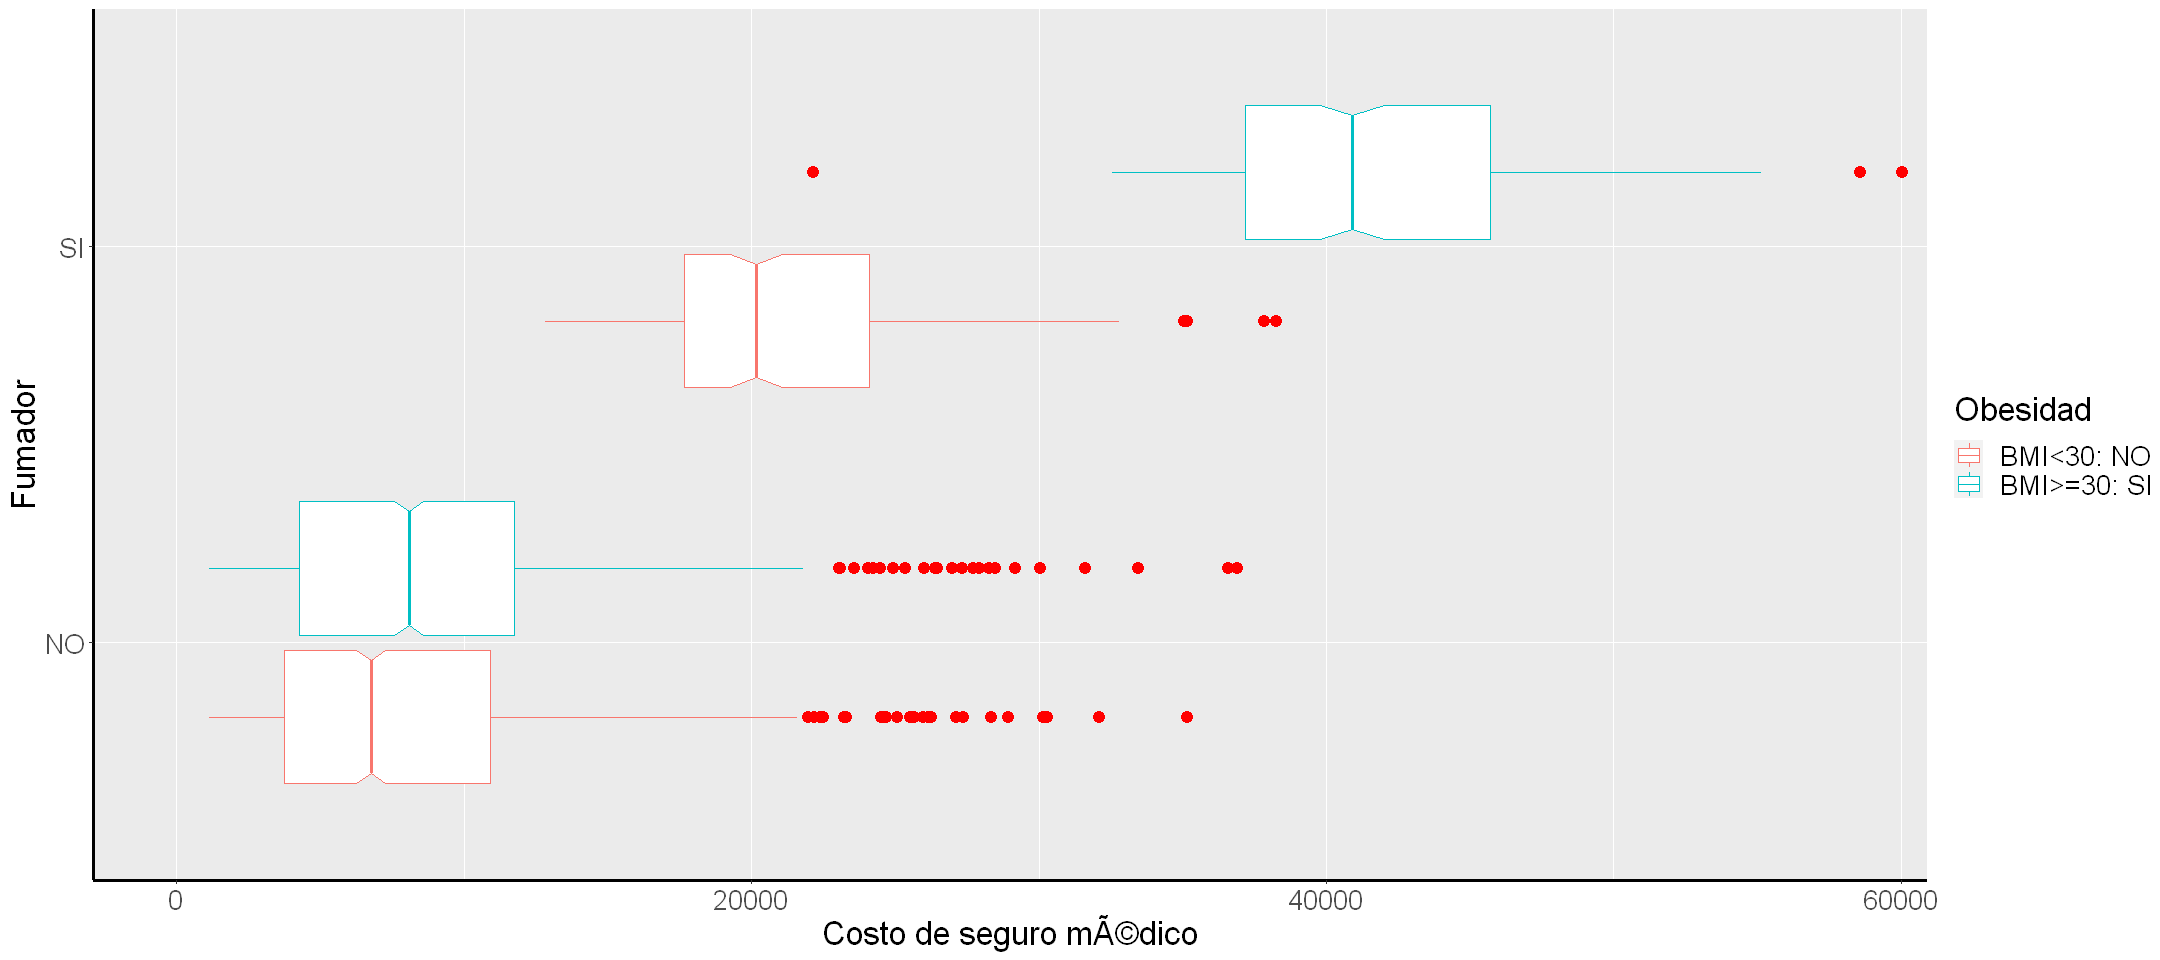

In [2]:
p1

#### ***Figura 1.*** Costo de seguro médico para 3 casos: personas con obesidad o tabaquismo, con tabaquismo y obesidad, sin condiciones preexistentes.

### **Buscando la zona adecuada**

En la Fig. 1 [[6]](#6) se mostró que los fumadores y, especialmente los fumadores obesos, son aquellos que pagan mayores sumas por su seguro médico. Sin embargo, mayores ingresos de la empresa no significa mayores ganancias, ya que quedaría por analizar los gastos realizados por los clientes, lo que significa un costo para la empresa. Entonces, es posible que este grupo, que genera mayores ingresos, también sea el grupo que más utilice el servicio, generando mayores gastos en la empresa. Para hacer un análisis más realista, sería necesario tener en cuenta más variables, como la expectativa de vida de los diferentes grupos y los gastos que acarrean. Al no contar con estas variables en el dataset, el análisis se enfocará en maximizar los ingresos de la empresa y no las ganancias.
Se decidió seleccionar la zona que presentaba la mayor proporción de fumadores, y en caso de tener zonas con proporciones similares, enfocarse en la que además tuviera mayores índices de obesidad, ya que este grupo es el que paga mayores sumas por su seguro médico.

A partir de estos resultados, se decidió concentrar los esfuerzos en la zona Southeast, ya que tiene una mayor proporción de personas con factores de riesgo que pagarán más seguro médico.

### **Calculando los potenciales beneficios**

Si se colocan 500 carteles en la zona elegida, se estima que se alcanzará al 70% de la población, y de las personas que lo vieron, el 25% contratará el segudo, por lo que en total el 17,5% de la población contratará el seguro. Para un área de 10.000 habitantes, son 1750 nuevos clientes.

Para estimar los beneficios mínimos y máximos, se consideró que el ingreso mínimo ocurre cuando todos los nuevos clientes son no fumadores sin obesidad, y el ingreso máximo ocurre si todos los nuevos clientes son fumadores obesos. El ingreso individual que se consideró es el de la mediana de cada grupo.
Para que estas estimaciones tengan valor se considera que la muestra recibida es representativa de la población.

#### ***Tabla 1.*** Distribución de población por regiones, según sus parámetros de salud. Donde, personas S: sin condición preexsistente, O: obesas, F: fumadores y FO: fumadoras y obesas.

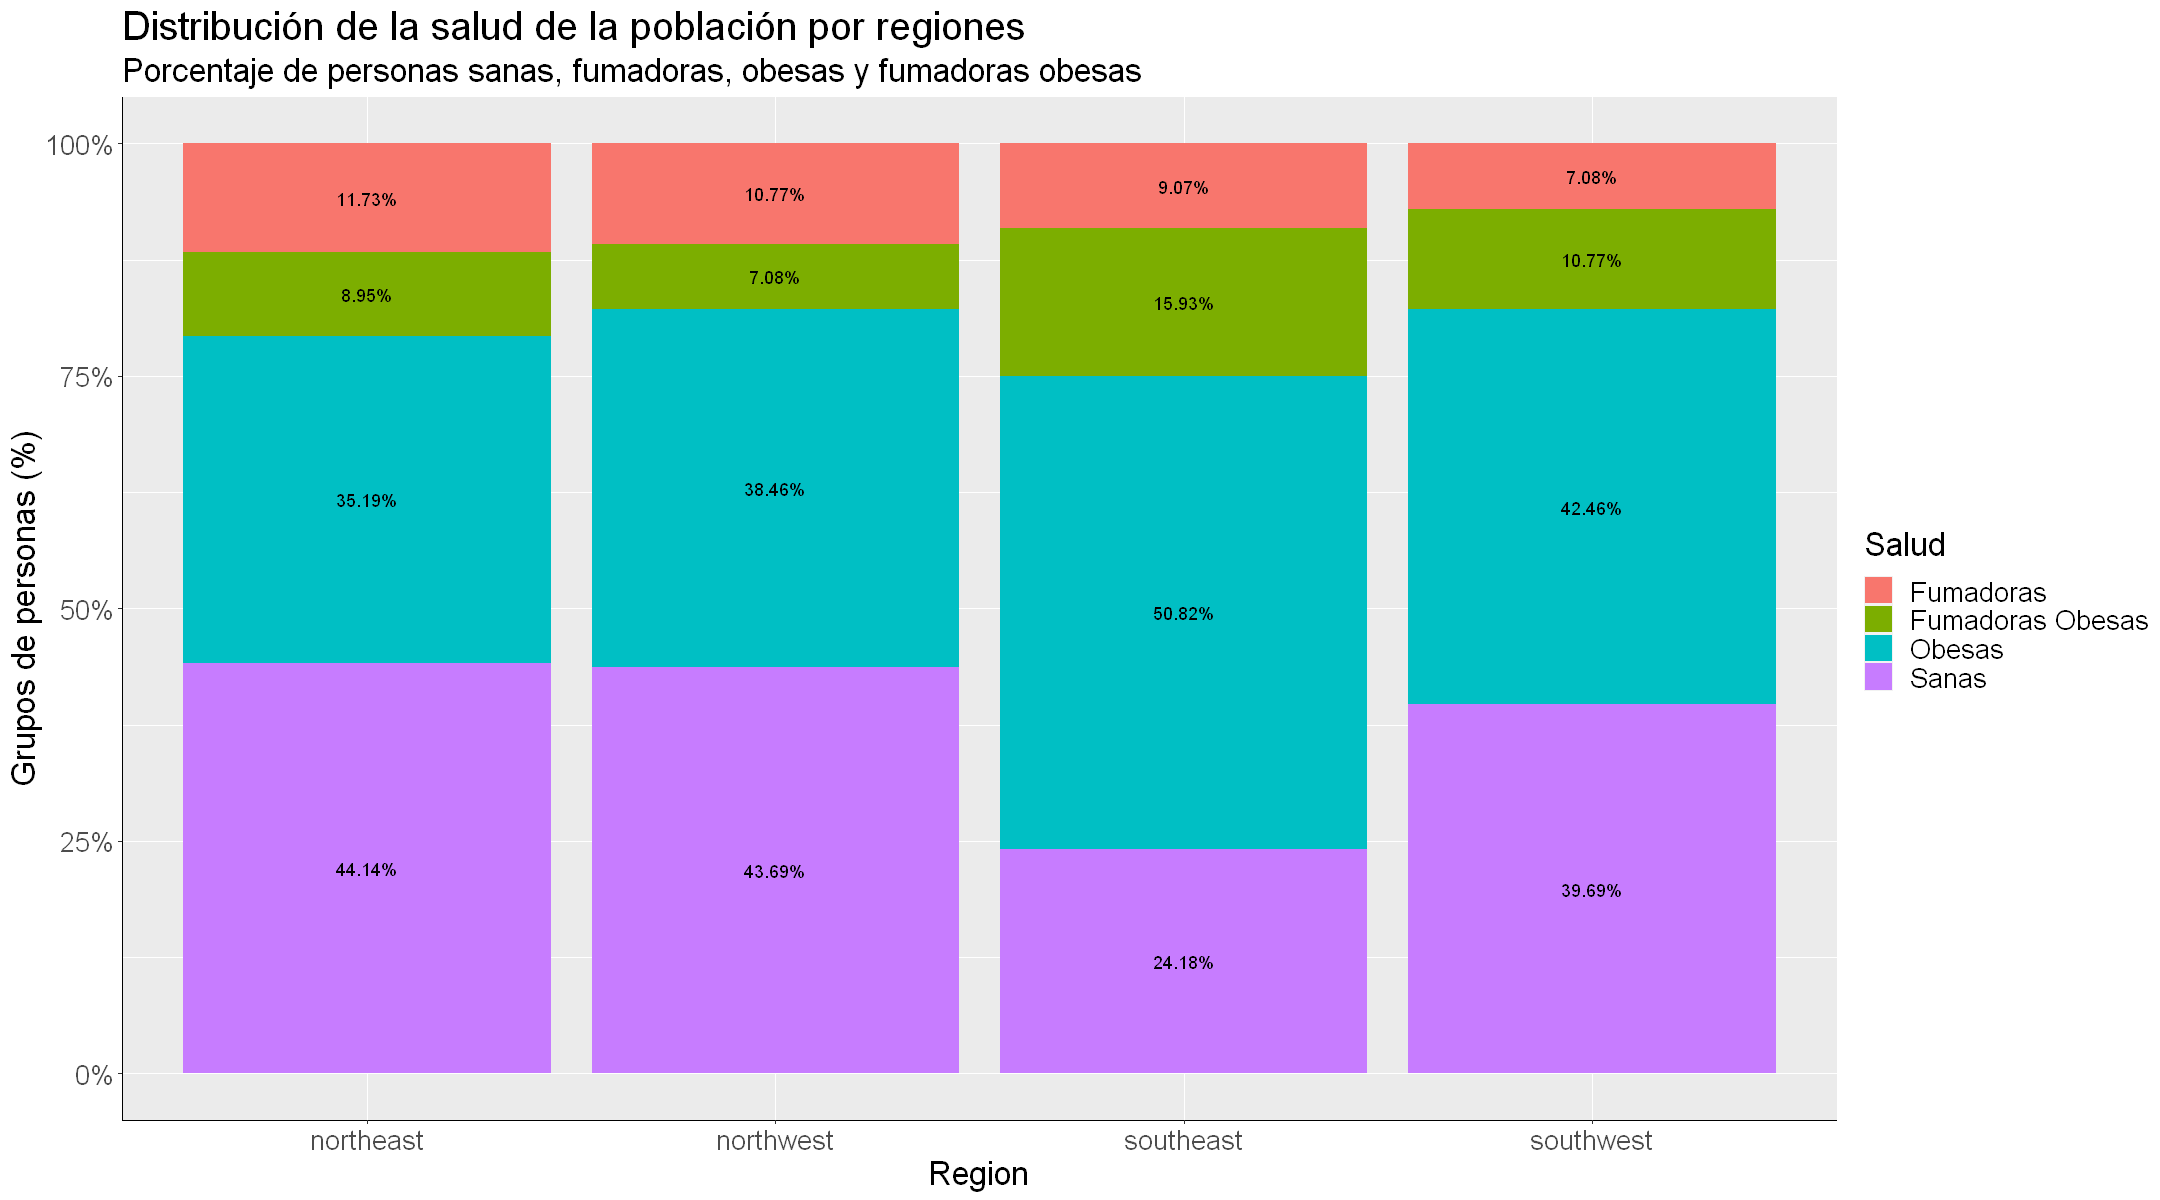

In [8]:
# Cambia tamaño del plot
options(repr.plot.width=18, repr.plot.height=10)
# Grafico de porcentaje de poblacion por grupo
ggplot(metricas_merge, aes(fill=salud, y=poblacion_pje, x=region)) + 
    geom_bar(position="fill", stat="identity") +
    labs(
        title = "Distribución de la salud de la población por regiones",
        subtitle = "Porcentaje de personas sanas, fumadoras, obesas y fumadoras obesas",
        fill = "Salud"
    ) +
    xlab("Region") +
    ylab("Grupos de personas (%)") +
    scale_fill_discrete(labels=c('Fumadoras', 'Fumadoras Obesas', 'Obesas', 'Sanas')) +
    scale_y_continuous(labels = scales::percent_format(accuracy = 1)) +
    geom_text(aes(label = paste0(poblacion_pje,"%")), colour = "black", position = position_fill(vjust = 0.5)) +
    theme(axis.line = element_line(colour = "black", size = 0.5), text = element_text(size = 20))

Con estos resultados, se decidió concentrar los esfuerzos en la zona Southeast, ya que tiene una mayor proporción de personas con factores de riesgo que pagarán más seguro médico.

## Calculando los potenciales beneficios

Si se colocan 500 carteles en la zona elegida, se estima que se alcanzará al 70% de la población, y de las personas que lo vieron, el 25% contratará el segudo, por lo que en total el 17,5% de la población contratará el seguro. Para un área de 10.000 habitantes, son 1750 potenciales nuevos clientes.

Para cada grupo con distintos factores de riesgo se calculó la mediana por edad y se hizo un gráfico de puntos. De este modo se hizo una regresión lineal para poder estimar el ingreso por edad.

In [5]:
df_seguros <- mutate(df_seguros,
                     obesidad = bmi >= 30,
                     rango_etario = case_when((18 <= age & age < 30) ~ '18 a 29', 
                               (30 <= age & age < 40) ~ '30 a 39', 
                               (40 <= age & age < 50) ~ '40 a 49', 
                               (50 <= age & age < 60) ~ '50 a 59', 
                               (60 <= age) ~ '60 <='),
                     salud = case_when((obesidad == TRUE & smoker == 'yes') ~ 'FO', 
                                              (obesidad == TRUE & smoker == 'no') ~ 'O', 
                                              (obesidad == FALSE & smoker == 'yes') ~ 'F', 
                                              (obesidad == FALSE & smoker == 'no') ~ 'SANO'))
df_seguros_3 <- group_by(df_seguros, salud, age)
metricas_df3 <- summarise(df_seguros_3,
          mediana_ch=median(charges),
          media_ch=mean(charges),
          cantidad=n()
          )

`summarise()` has grouped output by 'salud'. You can override using the
`.groups` argument.


In [6]:
library(ggpubr)

ERROR: Error in library(ggpubr): there is no package called 'ggpubr'


In [ ]:
ggplot(metricas_df3, aes(x=age, y=mediana_ch, color = salud)) +
  geom_point(alpha=0.7) + geom_smooth(method='lm', se=FALSE, formula= y ~ x) +
  #stat_regline_equation(aes(label = ..eq.label..)) +
  labs(
    x = 'Edad',
    y = 'Mediana Gastos de Seguro',
    title = 'Edad vs Mediana de Gastos de Seguro, por estado de salud',
    # tag = 'Se incluyen las ecuaciones de las líneas de tendencia',
    color = 'Estado de salud'
  ) +
  scale_color_discrete(labels = c('Fumador','Fumador Obeso','Obeso','Sano'))

#### made it by: <a id="5"></a> Pablo Peitsch <a href="https://github.com/PPeitsch">@PPeitsch</a>